<h2 style='color:blue' align='center'>Implementation of stochastic and batch grandient descent in python</h2>

#### Here I used simple home prices data set to implement batch and stochastic gradient descent in python. 

1. Batch gradient descent uses *all* training samples in forward pass to calculate cumulative error and then we adjust weights using derivaties. 

2. In stochastic GD, we randomly pick *one* training sample, perform forward pass, compute the error and immediately adjust weights. 

3. Mini batch GD: we use a batch of m samples where 0 < m < n (where n is total number of training samples)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### load the dataset in pandas dataframe

In [2]:
df=pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
18,2770,3,102.0
7,3300,4,155.0
15,1175,2,42.0
5,1170,2,38.0
13,1100,2,40.0


In [3]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis=1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

##### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [21]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [23]:
w=np.ones(shape=(2))

In [24]:
scaled_X.shape

(20, 2)

In [7]:
np.dot(w,scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

<h3 style='color:purple'>(1) Batch Gradient Descent Implementation</h3>

In [25]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]

    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        y_predicted=np.dot(w,scaled_X.T)+b  #w1*area+w2*bedrooms

        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(y_true-y_predicted))
        

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost





(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

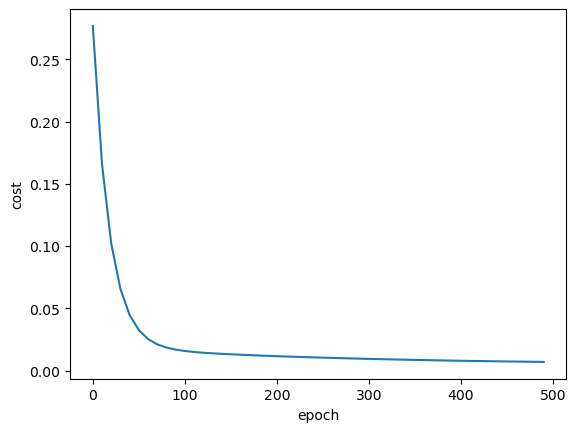

In [26]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [27]:
def predict(area,bedrooms,w,b):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

c:\Users\joths\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


<h3 style='color:purple'>(2) Stochastic Gradient Descent Implementation</h3>

#### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [28]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

1

In [30]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70932036, 0.676279  ]), -0.23080559196865494, 0.00034108609254520755)

In [31]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

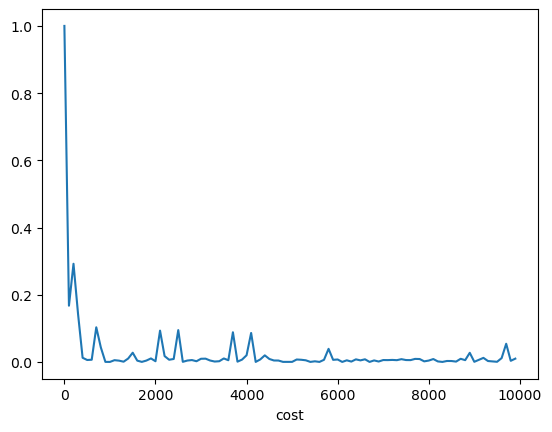

In [32]:
plt.xlabel('Epoch')
plt.xlabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [46]:
predict(2600,4,w_sgd, b_sgd)

c:\Users\joths\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.750648136151

<h3 style='color:purple'>(3) Mini Batch Gradient Descent Implementation</h3>

In [43]:
def mini_batch_gradient(X,y_true,epochs=100,batch_size=5,learning_rate=0.01):
    number_of_features=X.shape[1]
    total_samples=X.shape[0]
    w=np.ones(shape=(number_of_features))
    b=0
    if batch_size>total_samples:
        batch_size=total_samples
    cost_list=[]
    epoch_list=[]
    num_batches=int(total_samples/batch_size)
    for i in range(epochs):
        random_indices=np.random.permutation(total_samples)
        X_tmp=X[random_indices]
        y_tmp=y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj=X_tmp[j:j+batch_size]
            yj=y_tmp[j:j+batch_size]
            y_predicted=np.dot(w,Xj.T)+b
            w_grd_mn=-(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grd_mn=-(2/len(Xj))*(np.sum(yj-y_predicted))
            w=w-learning_rate*w_grd_mn
            b=b-learning_rate*b_grd_mn
            cost=np.mean(np.square(yj-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=mini_batch_gradient(scaled_X,scaled_y.reshape(scaled_y.shape[0],),epochs=120,batch_size=5,learning_rate=0.01)
w, b, cost


    

(array([0.70997163, 0.67812088]), -0.23338702146842139, 0.004270084203383639)

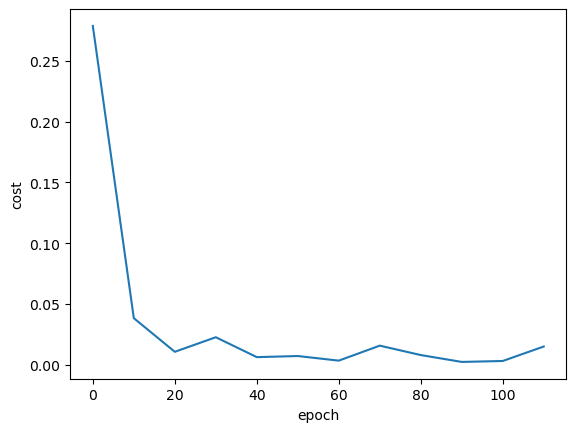

In [44]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [45]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

c:\Users\joths\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.64321682028498